In [1]:
# Capstone A Project - Spring 2020
# Kaggle Attrition data - Exploratory Data Analysis Python Code 
# Reference URL:  https://www.kaggle.com/abhishektibrewal/hr-employee-attrition

# data transformation
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime

# data plotting
import seaborn as sns
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# classification & correlation
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics as mt
#import xgboost as xgb




C:\Users\shayden\Anaconda3\envs\TF py_3_7\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [2]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf



print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

C:\Users\shayden\Anaconda3\envs\TF py_3_7\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shayden\Anaconda3\envs\TF py_3_7\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shayden\Anaconda3\envs\TF py_3_7\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shayden\Anaconda3\envs\TF py_3_7\lib\site-pack

Tensor Flow Version: 1.13.1
Keras Version: 2.2.4-tf

Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
Pandas 1.0.5
Scikit-Learn 0.23.1
GPU is NOT AVAILABLE


In [3]:
## Importing data from an Excel file:
## Prior to loading the file, convert it to csv in Excel 
## Setting datatypes prior to load

## updated data types to match types in IBM's as listed here:  
## http://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html

datatypes = {
"Age": "int",
"Attrition": "category",
"BusinessTravel": "category",
"DailyRate": "int",
"Department": "category",
"DistanceFromHome": "int",
"Education": "int", ## changed to int
"EducationField": "category",
"EmployeeCount": "int",
"EmployeeNumber": "int",
"EnvironmentSatisfaction": "int", ## changed
"Gender": "category",
"HourlyRate": "int",
"JobInvolvement": "int", ## changed
"JobLevel": "int", #changed
"JobRole": "category",
"JobSatisfaction": "int", ## changed
"MaritalStatus": "category",
"MonthlyIncome": "int",
"MonthlyRate": "int",
"NumCompaniesWorked": "int",
"Over18": "category",
"OverTime": "category",
"PercentSalaryHike": "float",
"PerformanceRating": "int", ## changed
"RelationshipSatisfaction": "int", ## changed
"StandardHours": "int",
"StockOptionLevel": "int",  ## changed
"TotalWorkingYears": "int",
"TrainingTimesLastYear": "int",
"WorkLifeBalance": "int", #changed
"YearsAtCompany": "int",
"YearsInCurrentRole": "int",
"YearsSinceLastPromotion": "int",
"YearsWithCurrManager": "int"
}

df = pd.read_csv('https://raw.githubusercontent.com/skhayden/SMU-Capstone-Age-Bias-in-Predictive-Modeling-/master/WA_Fn-UseC_-HR-Employee-Attrition.csv',low_memory=False)


# Verifying the upload of the data looking at the first 5 rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Verifying the upload of the data looking at the last 5 rows

df.tail()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
# Verifying the dimensions of the data set - (rows, cols)

df.shape

(1470, 35)

In [6]:
# Check what data types the features are

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Retrieve simple statistics from the data set

df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# Exploring our Age feature

df.Age.unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [10]:
# Exploring our Age feature

df.Age.value_counts()

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [11]:
min(df['Age'])

18

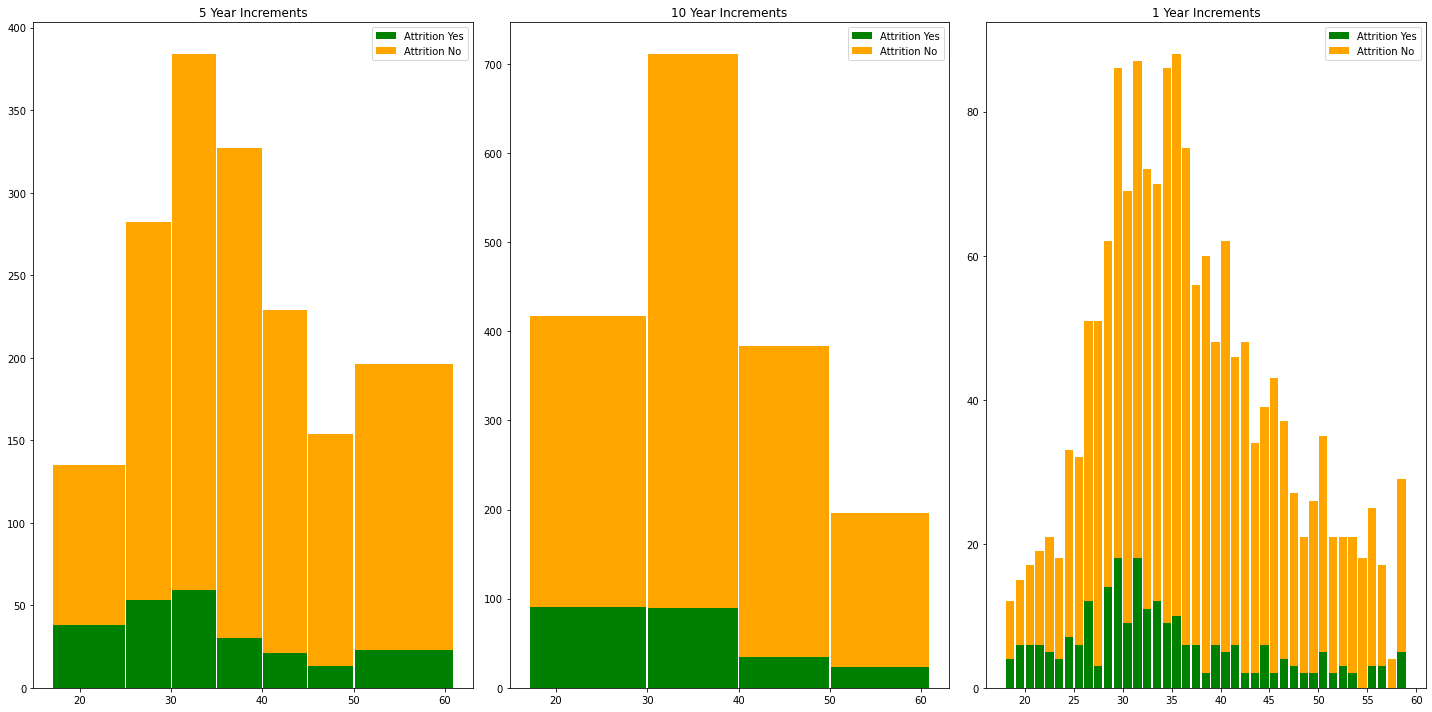

In [12]:
#decade increments
bin_labels10 = ['<=30', '>30 & <=40', '>40 & <=50', '>50']
bins10 = [(min(df['Age'])-1), 30, 40, 50, (max(df['Age'])+1)]
df['Age_group_Decade'] = pd.cut(df['Age'], bins=bins10, labels=bin_labels10)


#half decade increments
bin_labels5 = ['<=25', '>25 & <=30','>30 & <=35','>35 & <=40','>40 & <=45','>45 & <=50','>50']
bins5 = [(min(df['Age'])-1), 25, 30, 35, 40, 45, 50, (max(df['Age'])+1)]
df['Age_group_half_Decade'] = pd.cut(df['Age'], bins=bins5, labels=bin_labels5)

#year increments
bin_labels1 = list(range(min(df['Age']),max(df['Age'])))
bins1 = list(range(min(df['Age']),max(df['Age'])))
df['Age_group_Year'] = pd.cut(df['Age'], bins=bins1, labels=bin_labels1[0:len(bin_labels1)-1])



fig, ((ax0, ax1,ax2)) = plt.subplots( ncols=3,figsize=(20, 10))

ax0.hist([df['Age'].loc[df['Attrition']=='Yes'],
          df['Age']],bins=bins5, stacked=True,color=['green', 'orange'], 
          rwidth=0.98,label=['Attrition Yes', 'Attrition No'])
ax0.set_title('5 Year Increments')
ax0.legend(prop={'size': 10})

ax1.hist([df['Age'].loc[df['Attrition']=='Yes'],
          df['Age']],bins=bins10, stacked=True,color=['green', 'orange'], 
          rwidth=0.98,label=['Attrition Yes', 'Attrition No'])
ax1.set_title('10 Year Increments')
ax1.legend(prop={'size': 10})

ax2.hist([df['Age'].loc[df['Attrition']=='Yes'],
          df['Age']],bins=bins1, stacked=True,color=['green', 'orange'], 
          rwidth=0.85,label=['Attrition Yes', 'Attrition No'])
ax2.set_title('1 Year Increments')
ax2.legend(prop={'size': 10})

fig.tight_layout()
plt.show()


In [13]:
idx = pd.IndexSlice
#10 year perc
Agedf10=df.groupby(['Age_group_Decade', 'Attrition']).agg({'Attrition': 'count'})
Age10_pcts = Agedf10.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
#5 year perc
Agedf5=df.groupby(['Age_group_half_Decade', 'Attrition']).agg({'Attrition': 'count'})
Age5_pcts = Agedf5.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

#1 year perc
Agedf1=df.groupby(['Age_group_Year', 'Attrition']).agg({'Attrition': 'count'})
Age1_pcts = Agedf1.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))






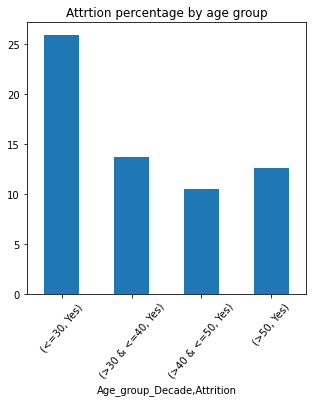

In [14]:

Age10_pcts.loc[idx[:, ['Yes']], idx['Attrition']].plot.bar(figsize=(5, 5),layout=(2, 2),
                title='Attrtion percentage by age group',rot=50)


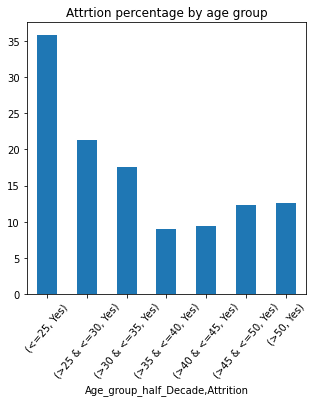

In [15]:
Age5_pcts.loc[idx[:, ['Yes']], idx['Attrition']].plot.bar(figsize=(5, 5),layout=(2, 2),
                title='Attrtion percentage by age group',rot=50)


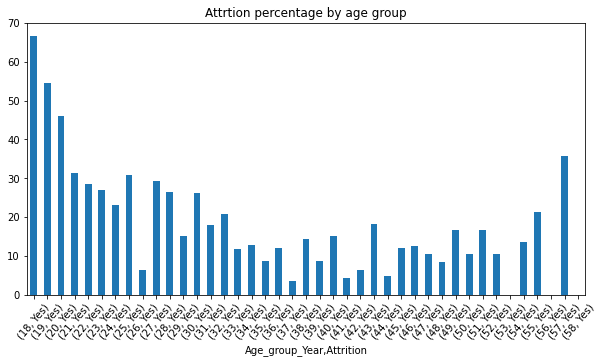

In [16]:
Age1_pcts.loc[idx[:, ['Yes']], idx['Attrition']].plot.bar(figsize=(10, 5),
                    layout=(2, 2),title='Attrtion percentage by age group',
                    rot=50)


In [17]:
## In order to get familiarized with data set, we are displaying categorical frequency groupings for:
## categorical features 
## some numerical features with levels 
## target label (Y - Attrition)

##### Categorical Features   #####

## Attrition Frequency
df_byAttrition = df.groupby(['Attrition'])
print(df_byAttrition.Attrition.count())
print(" ")
print(" ")

## BusinessTravel Frequency
df_byBusinessTravel = df.groupby(['BusinessTravel'])
print(df_byBusinessTravel.BusinessTravel.count())
print(" ")
print(" ")

## Department Frequency
df_byDepartment = df.groupby(['Department'])
print(df_byDepartment.Department.count())
print(" ")
print(" ")

## Education Field Frequency Table
df_byEducationField = df.groupby(['EducationField'])
print(df_byEducationField .EducationField.count())
print(" ")
print(" ")

## Gender Frequency Table
df_byGender = df.groupby(['Gender'])
print(df_byGender.Gender.count())
print(" ")
print(" ")

## JobRole Frequency Table
df_byJobRole = df.groupby(['JobRole'])
print(df_byJobRole.JobRole.count())
print(" ")
print(" ")

## MaritalStatus  Frequency Table
df_byMaritalStatus  = df.groupby(['MaritalStatus'])
print(df_byMaritalStatus.MaritalStatus.count())
print(" ")
print(" ")

## Over18  Frequency Table
df_byOver18  = df.groupby(['Over18'])
print(df_byOver18.Over18.count())
print(" ")
print(" ")

## OverTime  Frequency Table
df_byOverTime  = df.groupby(['OverTime'])
print(df_byOverTime.OverTime.count())
print(" ")
print(" ")





#### Numerical features with levels  ####
print("Numerical features with levels")
print(" ")
print(" ")



## Education Frequency
df_byEducation = df.groupby(['Education'])
print(df_byEducation.Education.count())
print(" ")
print(" ")

## df_byEnvironmentSatisfaction Frequency Table
df_byEnvironmentSatisfaction = df.groupby(['EnvironmentSatisfaction'])
print(df_byEnvironmentSatisfaction.EnvironmentSatisfaction.count())
print(" ")
print(" ")

## JobInvolvement Frequency Table
df_byJobInvolvement = df.groupby(['JobInvolvement'])
print(df_byJobInvolvement.JobInvolvement.count())
print(" ")
print(" ")

## JobLevel Frequency Table
df_byJobLevel = df.groupby(['JobLevel'])
print(df_byJobLevel.JobLevel.count())
print(" ")
print(" ")

## JobSatisfaction Frequency Table
df_byJobSatisfaction = df.groupby(['JobSatisfaction'])
print(df_byJobSatisfaction.JobSatisfaction.count())
print(" ")
print(" ")

## PerformanceRating  Frequency Table
df_byPerformanceRating  = df.groupby(['PerformanceRating'])
print(df_byPerformanceRating.PerformanceRating.count())
print(" ")
print(" ")

## RelationshipSatisfaction  Frequency Table
df_byRelationshipSatisfaction  = df.groupby(['RelationshipSatisfaction'])
print(df_byRelationshipSatisfaction.RelationshipSatisfaction.count())
print(" ")
print(" ")

## StockOptionLevel  Frequency Table
df_byStockOptionLevel  = df.groupby(['StockOptionLevel'])
print(df_byStockOptionLevel.StockOptionLevel.count())
print(" ")
print(" ")

## WorkLifeBalance  Frequency Table
df_byWorkLifeBalance  = df.groupby(['WorkLifeBalance'])
print(df_byWorkLifeBalance.WorkLifeBalance.count())
print(" ")
print(" ")



Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
 
 
BusinessTravel
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
Name: BusinessTravel, dtype: int64
 
 
Department
Human Resources            63
Research & Development    961
Sales                     446
Name: Department, dtype: int64
 
 
EducationField
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
Name: EducationField, dtype: int64
 
 
Gender
Female    588
Male      882
Name: Gender, dtype: int64
 
 
JobRole
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative          83
Name: JobRole, dtype: int64
 
 
MaritalStatus
Divorced    327
Married     673
Single      470
N

In [18]:
## Reducing levels in Education feature from 5(five) to 4 (four) levels

df_byEducation = df.groupby(['Education'])
print(df_byEducation.Education.count())
print(" ")
print(" ")

i = 0
while (i < df.Education.count()):
   ##print ("The Education value is:", df.Education[i])
   if df.Education[i] == 5:
     df.Education[i] = 4
   i = i + 1


df_byEducation = df.groupby(['Education'])
print(df_byEducation.Education.count())
print(" ")
print(" ")

Education
1    170
2    282
3    572
4    398
5     48
Name: Education, dtype: int64
 
 
Education
1    170
2    282
3    572
4    446
Name: Education, dtype: int64
 
 


C:\Users\shayden\Anaconda3\envs\TF py_3_7\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Create the target with a binary flag. 1 indicates that they left, and 0 indicates they did not. 

In [19]:
#OneHotdf.columns
#list(df.select_dtypes(exclude = 'int64').columns)
#Categorical_Columns= list(df.select_dtypes(exclude = 'int64').columns)
#Categorical_Columns=Categorical_Columns[0:len(Categorical_Columns)-3]
#Categorical_Columns
#Categorical_Columns[0:len(Categorical_Columns)-3]

In [20]:
#save transformed date to csv
#df.to_csv('AttritionDataFrame.csv')

In [21]:
####### Steven One hot encouding 

exclude=df.select_dtypes('int64').columns

#get columns to onehot encoude
Numeric_Columns=list(df.select_dtypes('int64').columns)
Categorical_Columns= list(df.select_dtypes(exclude = 'int64').columns)

               
########
#onehot
OneHotdf = pd.get_dummies(df[Categorical_Columns].drop(['Attrition',
                                'Age_group_Decade','Age_group_half_Decade',
                                'Age_group_Year'],axis=1))

#remove binary varible that is duplicated
OneHotdf = OneHotdf.drop(['OverTime_No','Gender_Male'],axis=1)

#df=df.drop(Categorical_Columns,axis=1)
df = pd.concat([df,OneHotdf], axis=1)


#create target 
df['Target_Attrition_Flag'] = np.where(df['Attrition']=='Yes', 1, 0)


In [22]:
## Preprocessing, Label Encoding Attrition, the Target Label, and non-numerical value features to add to correlation matrix and
## AttritionOne will be used as the Target label in  XGBoster classifier


le = preprocessing.LabelEncoder()

AttritionOne       = le.fit_transform(df.Attrition)
BusinessTravelOne  = le.fit_transform(df.BusinessTravel)
DepartmentOne      = le.fit_transform(df.Department)
EducationFieldOne  = le.fit_transform(df.EducationField)
GenderOne          = le.fit_transform(df.Gender)
JobRoleOne         = le.fit_transform(df.JobRole)
MaritalStatusOne   = le.fit_transform(df.MaritalStatus)
Over18One          = le.fit_transform(df.Over18)
OverTimeOne        = le.fit_transform(df.OverTime)



df2 = pd.DataFrame({'AttritionOne':AttritionOne.tolist(),
                    'BusinessTravelOne':BusinessTravelOne.tolist(),
                    'DepartmentOne':DepartmentOne.tolist(),
                    'EducationFieldOne':EducationFieldOne.tolist(),
                    'GenderOne':GenderOne.tolist(),
                    'JobRoleOne':JobRoleOne.tolist(),
                    'MaritalStatusOne':MaritalStatusOne.tolist(),
                    'Over18One':Over18One.tolist(),
                    'OverTimeOne':OverTimeOne.tolist()
                   })

df3 = pd.concat([df, df2], axis=1)

## print(df2.AttritionOne)




In [23]:
df2.AttritionOne

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: AttritionOne, Length: 1470, dtype: int64

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 75 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                1470 non-null   int64   
 1   Attrition                          1470 non-null   object  
 2   BusinessTravel                     1470 non-null   object  
 3   DailyRate                          1470 non-null   int64   
 4   Department                         1470 non-null   object  
 5   DistanceFromHome                   1470 non-null   int64   
 6   Education                          1470 non-null   int64   
 7   EducationField                     1470 non-null   object  
 8   EmployeeCount                      1470 non-null   int64   
 9   EmployeeNumber                     1470 non-null   int64   
 10  EnvironmentSatisfaction            1470 non-null   int64   
 11  Gender                             1470 non

In [25]:
# Let's explore correlations between features

corr = df3.corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,Target_Attrition_Flag,AttritionOne,BusinessTravelOne,DepartmentOne,EducationFieldOne,GenderOne,JobRoleOne,MaritalStatusOne,Over18One,OverTimeOne
Age,1.000000,0.010661,-0.001686,0.208334,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,-0.159205,-0.159205,0.024751,-0.031882,-0.040873,-0.036311,-0.122427,-0.095029,NaN,0.028062
DailyRate,0.010661,1.000000,-0.004985,-0.016309,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,-0.056652,-0.056652,-0.004086,0.007109,0.037709,-0.011716,-0.009472,-0.069586,NaN,0.009135
DistanceFromHome,-0.001686,-0.004985,1.000000,0.016755,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.077924,0.077924,-0.024469,0.017225,0.002013,-0.001851,-0.001015,-0.014437,NaN,0.025514
Education,0.208334,-0.016309,0.016755,1.000000,NaN,0.044472,-0.026258,0.013469,0.039844,0.093198,...,-0.027852,-0.027852,0.002018,0.009100,-0.038108,-0.013438,0.004182,0.002995,NaN,-0.022067
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GenderOne,-0.036311,-0.011716,-0.001851,-0.013438,NaN,0.022556,0.000508,-0.000478,0.017960,-0.039403,...,0.029453,0.029453,-0.032981,-0.041583,-0.002504,1.000000,-0.039723,-0.047183,NaN,-0.041924
JobRoleOne,-0.122427,-0.009472,-0.001015,0.004182,NaN,-0.010336,-0.017321,-0.018861,0.006616,-0.085457,...,0.067151,0.067151,0.002724,0.662431,0.015599,-0.039723,1.000000,0.067957,NaN,0.040662
MaritalStatusOne,-0.095029,-0.069586,-0.014437,0.002995,NaN,-0.008155,-0.003593,-0.017861,-0.038497,-0.076769,...,0.162070,0.162070,0.024001,0.056073,0.014420,-0.047183,0.067957,1.000000,NaN,-0.017521
Over18One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


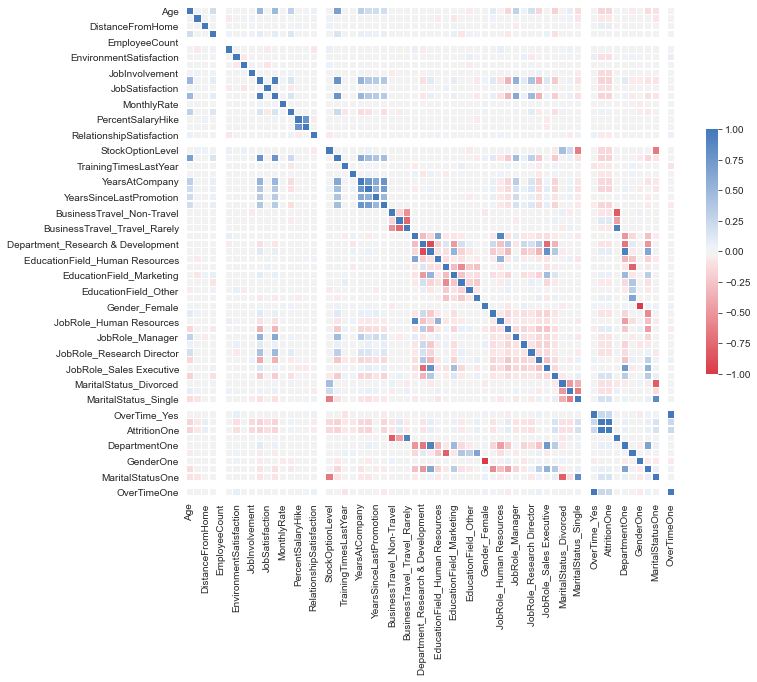

In [26]:
# Mapping feature correlation with a Seaborn heatmap  
# Referenced tutorial:  https://riptutorial.com/seaborn/example/31922/basic-correlation-plot

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(corr, 
        cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, 
        center=0,
        vmin=-1)

Create group attribute for age



df.loc[df['Age'] < 20, 'Age_Group'] = '<20'
df.loc[(df['Age'] >=20 ) & (df['Age'] < 30), 'Age_Group'] = '>=20 & <30'
df.loc[(df['Age'] >=30 ) & (df['Age'] < 40), 'Age_Group'] = '>=30 & <40'
df.loc[(df['Age'] >=40 ) & (df['Age'] < 50), 'Age_Group'] = '>=40 & <50'
df.loc[(df['Age'] >=50 ), 'Age_Group'] = '>=50'


#### Splitting Data and Training Model

Create training and testing data set. This is also where we included and excluded "**Age**"

In [27]:
#drop Categrical columns that have dummie columns
df=df.drop(Categorical_Columns[:-3],axis=1)
#remove vars from trainning either for bias or target value
# This is where you remove "Age" by including in the line below.
Columns_to_drop_for_Training=['Target_Attrition_Flag','Age_group_Year', 'Age_group_Decade','Age_group_half_Decade','Age','Over18_Y']

# Split into train/test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(Columns_to_drop_for_Training,axis=1), df['Target_Attrition_Flag'], test_size=0.25)	


In [28]:
print(X_test.shape)
print(X_train.shape)
print(y_train.shape )

(368, 51)
(1102, 51)
(1102,)


### Baseline model

In [29]:
#from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras import optimizers

 
#from tensorflow.keras.callbacks import EarlyStopping
#from keras.layers import LeakyReLU
#from sklearn import metrics
#from keras import optimizers





def define_predictor(n_input):
    leaky = lambda x: tf.keras.layers.LeakyReLU(alpha=0.1)(x)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(25, input_dim = n_input, activation=leaky)) # Hidden 1
    model.add(tf.keras.layers.Dense(50, activation=leaky)) # Hidden 2

    ## We need a softmax but got an error, so we used sigmoid
    ## we want to have the right input for the adversary, i.e., to retrieve yhat for future input to the Adversary,
    model.add(tf.keras.layers.Dense(1,activation='sigmoid')) # Output #1.2
    #model.add(tf.keras.layers.Dense(1,activation='softmax')) # Output
    #sgd = tf.keras.optimizers.SGD(lr=.0001, decay=1e-6, momentum=0.4, nesterov=False)# Best parm so far
    model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])
    return model
 



## try leakyReLu
#leaky = lambda x: tf.keras.layers.LeakyReLU(alpha=0.8)(x)


#model = Sequential()
#model.add(Dense(25, input_dim = X_train.shape[1], activation=leaky)) # Hidden 1

#model.add(Dense(10, activation=leaky)) # Hidden 2

#model.add(Dense(1,activation='sigmoid')) # Output

#sgd = tf.keras.optimizers.SGD(lr=.000001, decay=1e-6, momentum=0.7, nesterov=False)# Best parm so far
#model.compile(loss='binary_crossentropy', optimizer=sgd)

#adds an early stop incase the model gets stuck with higher epoch counts 
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=3, 
                        #verbose=1, mode='auto', restore_best_weights=True)

    
#setup scaler
scaler = preprocessing.StandardScaler()

Att_model = define_predictor(X_train.shape[1])
Att_model.fit(scaler.fit_transform(X_train),np.array(y_train), verbose=2, epochs=1000, batch_size=64)
Att_model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
 - 1s - loss: 0.5459 - acc: 0.7695
Epoch 2/1000
 - 0s - loss: 0.4383 - acc: 0.8385
Epoch 3/1000
 - 0s - loss: 0.4059 - acc: 0.8394
Epoch 4/1000
 - 0s - loss: 0.3847 - acc: 0.8475
Epoch 5/1000
 - 0s - loss: 0.3693 - acc: 0.8530
Epoch 6/1000
 - 0s - loss: 0.3558 - acc: 0.8521
Epoch 7/1000
 - 0s - loss: 0.3432 - acc: 0.8621
Epoch 8/1000
 - 0s - loss: 0.3312 - acc: 0.8757
Epoch 9/1000
 - 0s - loss: 0.3199 - acc: 0.8811
Epoch 10/1000
 - 0s - loss: 0.3095 - acc: 0.8848
Epoch 11/1000
 - 0s - loss: 0.2997 - acc: 0.8884
Epoch 12/1000
 - 0s - loss: 0.2904 - acc: 0.8947
Epoch 13/1000
 - 0s - loss: 0.2831 - acc: 0.8966
Epoch 14/1000
 - 0s - loss: 0.2749 - acc: 0.9020
Epoch 15/1000
 - 0s - loss: 0.2669 - acc: 0.9011
Epoch 16/1000
 - 0s - loss: 0.2609 - acc: 0.9056
Epoch 17/1000
 - 0s - loss: 0.2553 - acc: 0.9074
Epoch 18/1000
 - 0s - loss: 0.2499 - acc: 0.9047
Epoch 1

 - 0s - loss: 0.0028 - acc: 1.0000
Epoch 156/1000
 - 0s - loss: 0.0027 - acc: 1.0000
Epoch 157/1000
 - 0s - loss: 0.0026 - acc: 1.0000
Epoch 158/1000
 - 0s - loss: 0.0025 - acc: 1.0000
Epoch 159/1000
 - 0s - loss: 0.0025 - acc: 1.0000
Epoch 160/1000
 - 0s - loss: 0.0024 - acc: 1.0000
Epoch 161/1000
 - 0s - loss: 0.0024 - acc: 1.0000
Epoch 162/1000
 - 0s - loss: 0.0023 - acc: 1.0000
Epoch 163/1000
 - 0s - loss: 0.0022 - acc: 1.0000
Epoch 164/1000
 - 0s - loss: 0.0022 - acc: 1.0000
Epoch 165/1000
 - 0s - loss: 0.0021 - acc: 1.0000
Epoch 166/1000
 - 0s - loss: 0.0021 - acc: 1.0000
Epoch 167/1000
 - 0s - loss: 0.0021 - acc: 1.0000
Epoch 168/1000
 - 0s - loss: 0.0020 - acc: 1.0000
Epoch 169/1000
 - 0s - loss: 0.0019 - acc: 1.0000
Epoch 170/1000
 - 0s - loss: 0.0019 - acc: 1.0000
Epoch 171/1000
 - 0s - loss: 0.0019 - acc: 1.0000
Epoch 172/1000
 - 0s - loss: 0.0018 - acc: 1.0000
Epoch 173/1000
 - 0s - loss: 0.0018 - acc: 1.0000
Epoch 174/1000
 - 0s - loss: 0.0018 - acc: 1.0000
Epoch 175/1000


Epoch 311/1000
 - 0s - loss: 1.8485e-04 - acc: 1.0000
Epoch 312/1000
 - 0s - loss: 1.8209e-04 - acc: 1.0000
Epoch 313/1000
 - 0s - loss: 1.7813e-04 - acc: 1.0000
Epoch 314/1000
 - 0s - loss: 1.7689e-04 - acc: 1.0000
Epoch 315/1000
 - 0s - loss: 1.7602e-04 - acc: 1.0000
Epoch 316/1000
 - 0s - loss: 1.7194e-04 - acc: 1.0000
Epoch 317/1000
 - 0s - loss: 1.6960e-04 - acc: 1.0000
Epoch 318/1000
 - 0s - loss: 1.6743e-04 - acc: 1.0000
Epoch 319/1000
 - 0s - loss: 1.6481e-04 - acc: 1.0000
Epoch 320/1000
 - 0s - loss: 1.6256e-04 - acc: 1.0000
Epoch 321/1000
 - 0s - loss: 1.6007e-04 - acc: 1.0000
Epoch 322/1000
 - 0s - loss: 1.5809e-04 - acc: 1.0000
Epoch 323/1000
 - 0s - loss: 1.5695e-04 - acc: 1.0000
Epoch 324/1000
 - 0s - loss: 1.5453e-04 - acc: 1.0000
Epoch 325/1000
 - 0s - loss: 1.5103e-04 - acc: 1.0000
Epoch 326/1000
 - 0s - loss: 1.4998e-04 - acc: 1.0000
Epoch 327/1000
 - 0s - loss: 1.4780e-04 - acc: 1.0000
Epoch 328/1000
 - 0s - loss: 1.4537e-04 - acc: 1.0000
Epoch 329/1000
 - 0s - loss:

Epoch 463/1000
 - 0s - loss: 2.8652e-05 - acc: 1.0000
Epoch 464/1000
 - 0s - loss: 2.8220e-05 - acc: 1.0000
Epoch 465/1000
 - 0s - loss: 2.8220e-05 - acc: 1.0000
Epoch 466/1000
 - 0s - loss: 2.7586e-05 - acc: 1.0000
Epoch 467/1000
 - 0s - loss: 2.7259e-05 - acc: 1.0000
Epoch 468/1000
 - 0s - loss: 2.6887e-05 - acc: 1.0000
Epoch 469/1000
 - 0s - loss: 2.6548e-05 - acc: 1.0000
Epoch 470/1000
 - 0s - loss: 2.6272e-05 - acc: 1.0000
Epoch 471/1000
 - 0s - loss: 2.5996e-05 - acc: 1.0000
Epoch 472/1000
 - 0s - loss: 2.5671e-05 - acc: 1.0000
Epoch 473/1000
 - 0s - loss: 2.5477e-05 - acc: 1.0000
Epoch 474/1000
 - 0s - loss: 2.5059e-05 - acc: 1.0000
Epoch 475/1000
 - 0s - loss: 2.4756e-05 - acc: 1.0000
Epoch 476/1000
 - 0s - loss: 2.4596e-05 - acc: 1.0000
Epoch 477/1000
 - 0s - loss: 2.4500e-05 - acc: 1.0000
Epoch 478/1000
 - 0s - loss: 2.4082e-05 - acc: 1.0000
Epoch 479/1000
 - 0s - loss: 2.3671e-05 - acc: 1.0000
Epoch 480/1000
 - 0s - loss: 2.3517e-05 - acc: 1.0000
Epoch 481/1000
 - 0s - loss:

Epoch 615/1000
 - 0s - loss: 5.3664e-06 - acc: 1.0000
Epoch 616/1000
 - 0s - loss: 5.3636e-06 - acc: 1.0000
Epoch 617/1000
 - 0s - loss: 5.2447e-06 - acc: 1.0000
Epoch 618/1000
 - 0s - loss: 5.1987e-06 - acc: 1.0000
Epoch 619/1000
 - 0s - loss: 5.1460e-06 - acc: 1.0000
Epoch 620/1000
 - 0s - loss: 5.0817e-06 - acc: 1.0000
Epoch 621/1000
 - 0s - loss: 5.0263e-06 - acc: 1.0000
Epoch 622/1000
 - 0s - loss: 4.9898e-06 - acc: 1.0000
Epoch 623/1000
 - 0s - loss: 4.9474e-06 - acc: 1.0000
Epoch 624/1000
 - 0s - loss: 4.8837e-06 - acc: 1.0000
Epoch 625/1000
 - 0s - loss: 4.8909e-06 - acc: 1.0000
Epoch 626/1000
 - 0s - loss: 4.7963e-06 - acc: 1.0000
Epoch 627/1000
 - 0s - loss: 4.7457e-06 - acc: 1.0000
Epoch 628/1000
 - 0s - loss: 4.6798e-06 - acc: 1.0000
Epoch 629/1000
 - 0s - loss: 4.6415e-06 - acc: 1.0000
Epoch 630/1000
 - 0s - loss: 4.6151e-06 - acc: 1.0000
Epoch 631/1000
 - 0s - loss: 4.5382e-06 - acc: 1.0000
Epoch 632/1000
 - 0s - loss: 4.5127e-06 - acc: 1.0000
Epoch 633/1000
 - 0s - loss:

Epoch 767/1000
 - 0s - loss: 1.1548e-06 - acc: 1.0000
Epoch 768/1000
 - 0s - loss: 1.1465e-06 - acc: 1.0000
Epoch 769/1000
 - 0s - loss: 1.1325e-06 - acc: 1.0000
Epoch 770/1000
 - 0s - loss: 1.1230e-06 - acc: 1.0000
Epoch 771/1000
 - 0s - loss: 1.1086e-06 - acc: 1.0000
Epoch 772/1000
 - 0s - loss: 1.0996e-06 - acc: 1.0000
Epoch 773/1000
 - 0s - loss: 1.0882e-06 - acc: 1.0000
Epoch 774/1000
 - 0s - loss: 1.0812e-06 - acc: 1.0000
Epoch 775/1000
 - 0s - loss: 1.0830e-06 - acc: 1.0000
Epoch 776/1000
 - 0s - loss: 1.0647e-06 - acc: 1.0000
Epoch 777/1000
 - 0s - loss: 1.0487e-06 - acc: 1.0000
Epoch 778/1000
 - 0s - loss: 1.0430e-06 - acc: 1.0000
Epoch 779/1000
 - 0s - loss: 1.0280e-06 - acc: 1.0000
Epoch 780/1000
 - 0s - loss: 1.0182e-06 - acc: 1.0000
Epoch 781/1000
 - 0s - loss: 1.0116e-06 - acc: 1.0000
Epoch 782/1000
 - 0s - loss: 9.9820e-07 - acc: 1.0000
Epoch 783/1000
 - 0s - loss: 9.8906e-07 - acc: 1.0000
Epoch 784/1000
 - 0s - loss: 9.8273e-07 - acc: 1.0000
Epoch 785/1000
 - 0s - loss:

Epoch 919/1000
 - 0s - loss: 3.0348e-07 - acc: 1.0000
Epoch 920/1000
 - 0s - loss: 3.0205e-07 - acc: 1.0000
Epoch 921/1000
 - 0s - loss: 2.9960e-07 - acc: 1.0000
Epoch 922/1000
 - 0s - loss: 2.9792e-07 - acc: 1.0000
Epoch 923/1000
 - 0s - loss: 2.9542e-07 - acc: 1.0000
Epoch 924/1000
 - 0s - loss: 2.9348e-07 - acc: 1.0000
Epoch 925/1000
 - 0s - loss: 2.8969e-07 - acc: 1.0000
Epoch 926/1000
 - 0s - loss: 2.9116e-07 - acc: 1.0000
Epoch 927/1000
 - 0s - loss: 2.8736e-07 - acc: 1.0000
Epoch 928/1000
 - 0s - loss: 2.9068e-07 - acc: 1.0000
Epoch 929/1000
 - 0s - loss: 2.8326e-07 - acc: 1.0000
Epoch 930/1000
 - 0s - loss: 2.7988e-07 - acc: 1.0000
Epoch 931/1000
 - 0s - loss: 2.7847e-07 - acc: 1.0000
Epoch 932/1000
 - 0s - loss: 2.7535e-07 - acc: 1.0000
Epoch 933/1000
 - 0s - loss: 2.7379e-07 - acc: 1.0000
Epoch 934/1000
 - 0s - loss: 2.7235e-07 - acc: 1.0000
Epoch 935/1000
 - 0s - loss: 2.7080e-07 - acc: 1.0000
Epoch 936/1000
 - 0s - loss: 2.6886e-07 - acc: 1.0000
Epoch 937/1000
 - 0s - loss:

In [30]:
#print(tf.keras.__version__)

#p_model.get_weights()[4]

#### Break out age groups
We want to break out the age groups and compare their accuracy amongst each other to get an understanding of bias in the data set. 

In [31]:
# get overall accuracy 
Overall_pred = pd.DataFrame(Att_model.predict(scaler.fit_transform(X_test)))
Overall_y_compare = y_test
Overall_score = metrics.accuracy_score(Overall_y_compare, Overall_pred.astype(np.int32))



In [32]:
print(X_test.shape)
print(X_train.shape)
print(y_train.shape )

(368, 51)
(1102, 51)
(1102,)


In [33]:
#add back in age group 
X_test=pd.merge(X_test, df.drop(df.columns.difference(Columns_to_drop_for_Training), 1), left_index=True, right_index=True)


In [34]:

#mean_squared_error for GANS model

#funtion to get accuracy accrossed groups in grouped data
def Group_accuracy (model,x_test,y_test,Grouping,Atts_not_in_training,Print):
    # This function calculates accuracy of the model and can calculate accuracy 
    #across several groups in the data. This give you information need to 
    #produce a confusion matrix 
    
    #x_test = Test data of the explanatory variables  
    #y_test = Test data of the target variable 
    #Grouping = The variable that contains the grouping of the 
        #data that this function will use to break out accuracy 
    #Atts_not_in_training = Attributes not in x_test that where 
        #not in x_test for training the model. 
    
    from sklearn.metrics import confusion_matrix
    #confusion_matrix(y_test, Overall_Att_pred.astype(np.int32))
    
    Preds={}
    y_compare={}
    score={}
    Conf = {}
    
      
    for group in list(x_test[Grouping].dropna().unique()):
        
        #Get only the actuals based on the index of the 
        # independent variables within the specified age group  
        Preds[group]=pd.DataFrame(model.predict(scaler.fit_transform(x_test.loc[x_test[Grouping]==group].drop(Atts_not_in_training,axis=1))))
        
        #Get scores for each age group
        y_compare[group] = pd.DataFrame(y_test[x_test.loc[x_test[Grouping] == group].index])
        #Get scores for each age group
        score[group] = metrics.accuracy_score(y_compare[group], Preds[group].astype(np.int32))
        Conf[group] =confusion_matrix(y_compare[group], Preds[group].astype(np.int32))
    if Print==True:
        
        for key in score.keys():
            print("Age group "+ str(key) + " :{}".format(str(round((score[key]*100), 2))))
            print(Conf[key]) 

    return score


In [35]:
### Overall accuracy 
print("Overall accuracy of the model: {}".format(str(Overall_score))) 

#Get the predictions for only specified age groups
print('Age_group_Decade')
Decade_score=Group_accuracy (Att_model,X_test,y_test,'Age_group_Decade',Columns_to_drop_for_Training,True)  

print('Age_group_half_Decade')
Half_Decade_score=Group_accuracy (Att_model,X_test,y_test,'Age_group_half_Decade',Columns_to_drop_for_Training,True)
#print('Age_group_Year')
#Year_score=Group_accuracy (p_model,X_test,y_test,'Age_group_Year',Columns_to_drop_for_Training,True)




Overall accuracy of the model: 0.8478260869565217
Age_group_Decade
Age group <=30 :83.33
[[78  2]
 [15  7]]
Age group >30 & <=40 :82.39
[[113   5]
 [ 20   4]]
Age group >40 & <=50 :89.89
[[79  2]
 [ 7  1]]
Age group >50 :88.57
[[29  0]
 [ 4  2]]
Age_group_half_Decade
Age group <=25 :82.61
[[18  0]
 [ 4  1]]
Age group >35 & <=40 :85.94
[[53  2]
 [ 7  2]]
Age group >25 & <=30 :83.54
[[60  2]
 [11  6]]
Age group >30 & <=35 :82.05
[[61  2]
 [12  3]]
Age group >40 & <=45 :94.23
[[48  0]
 [ 3  1]]
Age group >45 & <=50 :81.08
[[30  3]
 [ 4  0]]
Age group >50 :88.57
[[29  0]
 [ 4  2]]


overall confusion Matrix

In [36]:
#overall Conf Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Overall_pred.astype(np.int32))
#X_test['Age_group_half_Decade'].unique()
#X_test.column



array([[296,  12],
       [ 44,  16]], dtype=int64)

In [37]:

X_test['Age_group_Decade'].value_counts()


>30 & <=40    142
<=30          102
>40 & <=50     89
>50            35
Name: Age_group_Decade, dtype: int64

In [38]:
X_test['Age_group_half_Decade'].value_counts()



>25 & <=30    79
>30 & <=35    78
>35 & <=40    64
>40 & <=45    52
>45 & <=50    37
>50           35
<=25          23
Name: Age_group_half_Decade, dtype: int64

In [39]:
#Create test and train for avisory model

X_train=X_train.join(df.drop(df.columns.difference(Columns_to_drop_for_Training), 1))
Age_Target_Train = X_train.drop(df.columns.difference(['Age']), 1)
Age_Target_Test = X_test.drop(df.columns.difference(['Age']), 1)
X_train=X_train.drop(Columns_to_drop_for_Training, 1)
X_test=X_test.drop(Columns_to_drop_for_Training, 1)

### Adversarial  debasing model 

In [40]:
#define our own loss function  
#root mean square error

def Mean_Square_Error2(y_true, y_pred):
    alpha=0.8
    return tf.multiply(alpha,tf.multiply(-1.0,tf.divide(tf.reduce_sum(tf.pow(tf.subtract(y_true, y_pred),2.0)),tf.cast(tf.size(y_true), tf.float32))))

In [41]:
### Referenced articles and keras documentation:

# https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/
# https://machinelearningmastery.com/how-to-code-the-generative-adversarial-network-training-algorithm-and-loss-functions/
# https://keras.io/getting_started/faq/

# 
# We update U(advisory)  to minimize LA at each training time step,
# according to the gradient ∇U LA. We modify W according to the expression:


#We present an adversarial technique for achieving
#whichever one of these definitions is desired.2 A predictor
#f will be trained to model Y as accurately as possible
# while satisfying one of the above equality constraints. Demographic
# parity will be achieved by introducing an adversary
# g which will attempt to predict a value for Z from ^ Y .
#The gradient of g will then be incorporated into the weight
#update rule of f so as to reduce the amount of information
#about Z transmitted through ^ Y . Equality of odds will be
#achieved by also giving g access to the true label Y , thereby
#limiting any information about Z which ^ Y contains beyond
#the information already contained in Y

#from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras import optimizers


 
# define the standalone discriminator model
# n_inputs is the number of features in your observations
def define_adversarial(n_inputs=1):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    #model.add(tf.keras.layers.Dense(25, activation='relu'))#2.0
    model.add(tf.keras.layers.Dense(1, activation='linear'))# This should not be Sigmoid i believe this should be something continuous activation 
    # compile model
    #model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])# dont need this line
    return model

### Generator Model

def define_predictor(n_input):
    #global dec_Pred #1.5
    #predictor.trainable = dec_Pred #1.5
    leaky = lambda x: tf.keras.layers.LeakyReLU(alpha=0.8)(x)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(25, input_dim = n_input, activation=leaky)) # Hidden 1
    model.add(tf.keras.layers.Dense(50, activation=leaky)) # Hidden 2

    ## We need a softmax but got an error, so we used sigmoid
    ## we want to have the right input for the adversary, i.e., to retrieve yhat for future input to the Adversary,
    model.add(tf.keras.layers.Dense(1,activation='sigmoid')) # Output
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 

# define the combined generator and discriminator model, for updating the generator
# By setting trainable=False after the discriminator has been compiled the discriminator is 
# still trained during discriminator.train_on_batch but since it's set to non-trainable before the 
# combined model is compiled it's not trained during combined.train_on_batch.

def define_gan(predictor, adversarial): #1.2
#def define_gan(predictor, adversarial):    
    #global dec_Gan #1.5
    # make weights in the discriminator not trainable
    #predictor.trainable = False#1.5
    #predictor.trainable = dec_Gan #1.5
    # connect them
    model = tf.keras.Sequential()
    # add generator
    model.add(predictor)  
    # add the discriminator
    model.add(adversarial)
    # compile model
## This is the loss function in the paper, expression (1) 
    #model.compile(loss='binary_crossentropy', optimizer='adam')
    sgd = tf.keras.optimizers.SGD(lr=.00001, decay=1e-6, momentum=0.6, nesterov=False)
    model.compile(loss=Mean_Square_Error2, optimizer=sgd)
    #predictor.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model




# train the generator and discriminator
#this is where you pass the weights 
#Z = age
def train(p_model, a_model, gan_model, X, Y, Z, n_epochs=1000, n_batch=64, n_eval=2000):
    #global dec_Pred #1.5
    #global dec_Gan #1.5
    # determine half the size of one batch, for updating the discriminator
    #half_batch = int(n_batch / 2)#dont need this line
    # manually enumerate epochs
    for i in range(n_epochs):

        
    # update advidarial
        dec_Pred=True
        p_loss = p_model.train_on_batch(X, Y)
        #PredM_Weights = p_model.get_weights()[4]#1.2
        #print(dec_Pred)
        # update the generator via the discriminator's error
        #dec_Gan =False #1.5
        #print(p_model.predict(X).shape)
        #g_loss=gan_model.train_on_batch(p_model.predict(X), Z) ##$### Is this where we pass the weights from the Predicotor model? ##$###
        g_loss=gan_model.train_on_batch(X, Z)
        #print(dec_Gan)
        
        print('Predictor loss/acc = ',str(p_loss))#,'GAN loss = ', str(g_loss))
        print('GAN loss = ',str(g_loss))









In [42]:
print(Age_Target_Train.shape)
print(X_train.shape)
print(y_train.shape )

(1102, 1)
(1102, 51)
(1102,)


In [43]:
#predictor.layers[2].output
#predictor.predict
y_train2=y_train.astype(np.int64)

In [44]:

#tf.cast(_X, dtype='float64')

# create the discriminator
adversarial = define_adversarial()
# create the generator
predictor = define_predictor(X_train.shape[1])
# create the gan
gan_model = define_gan(predictor, adversarial)
# train model
train(predictor, adversarial, gan_model,scaler.fit_transform(X_train),y_train2,Age_Target_Train)

Predictor loss/acc =  [0.7320295, 0.5018149]
GAN loss =  -1110.2124
Predictor loss/acc =  [0.71169144, 0.5217786]
GAN loss =  -1111.1274
Predictor loss/acc =  [0.6927165, 0.53901994]
GAN loss =  -1112.2006
Predictor loss/acc =  [0.67508835, 0.55353904]
GAN loss =  -1113.3495
Predictor loss/acc =  [0.65875375, 0.5662432]
GAN loss =  -1114.5256
Predictor loss/acc =  [0.6436408, 0.58983666]
GAN loss =  -1115.7015
Predictor loss/acc =  [0.62965786, 0.62068963]
GAN loss =  -1116.8617
Predictor loss/acc =  [0.6166967, 0.6524501]
GAN loss =  -1117.9983
Predictor loss/acc =  [0.6046509, 0.6660617]
GAN loss =  -1119.1073
Predictor loss/acc =  [0.5934075, 0.68421054]
GAN loss =  -1120.1881
Predictor loss/acc =  [0.58285797, 0.69509983]
GAN loss =  -1121.2417
Predictor loss/acc =  [0.57289153, 0.7041742]
GAN loss =  -1122.2694
Predictor loss/acc =  [0.5634132, 0.7168784]
GAN loss =  -1123.2723
Predictor loss/acc =  [0.55434126, 0.73049]
GAN loss =  -1124.2528
Predictor loss/acc =  [0.5456012, 0.7

Predictor loss/acc =  [0.2772246, 0.892922]
GAN loss =  -1169.6344
Predictor loss/acc =  [0.2769815, 0.892922]
GAN loss =  -1169.8446
Predictor loss/acc =  [0.2767387, 0.8938294]
GAN loss =  -1170.055
Predictor loss/acc =  [0.2764977, 0.8938294]
GAN loss =  -1170.2655
Predictor loss/acc =  [0.27625862, 0.8938294]
GAN loss =  -1170.4757
Predictor loss/acc =  [0.27602237, 0.8938294]
GAN loss =  -1170.6854
Predictor loss/acc =  [0.27578962, 0.892922]
GAN loss =  -1170.8949
Predictor loss/acc =  [0.27555868, 0.892922]
GAN loss =  -1171.1041
Predictor loss/acc =  [0.27532986, 0.892922]
GAN loss =  -1171.313
Predictor loss/acc =  [0.27510184, 0.892922]
GAN loss =  -1171.522
Predictor loss/acc =  [0.27487585, 0.892922]
GAN loss =  -1171.7313
Predictor loss/acc =  [0.27465028, 0.892922]
GAN loss =  -1171.9412
Predictor loss/acc =  [0.274425, 0.892922]
GAN loss =  -1172.1511
Predictor loss/acc =  [0.27420136, 0.892922]
GAN loss =  -1172.3612
Predictor loss/acc =  [0.27397823, 0.892922]
GAN loss

Predictor loss/acc =  [0.24539326, 0.9047187]
GAN loss =  -1198.9034
Predictor loss/acc =  [0.24507686, 0.9047187]
GAN loss =  -1199.14
Predictor loss/acc =  [0.2447582, 0.9047187]
GAN loss =  -1199.3768
Predictor loss/acc =  [0.24443658, 0.9065336]
GAN loss =  -1199.6146
Predictor loss/acc =  [0.24411249, 0.9065336]
GAN loss =  -1199.8525
Predictor loss/acc =  [0.24378638, 0.9065336]
GAN loss =  -1200.0912
Predictor loss/acc =  [0.24345817, 0.9065336]
GAN loss =  -1200.33
Predictor loss/acc =  [0.24312593, 0.9065336]
GAN loss =  -1200.569
Predictor loss/acc =  [0.24279073, 0.9065336]
GAN loss =  -1200.8086
Predictor loss/acc =  [0.24245213, 0.9065336]
GAN loss =  -1201.0487
Predictor loss/acc =  [0.24211179, 0.9065336]
GAN loss =  -1201.2893
Predictor loss/acc =  [0.24177006, 0.9065336]
GAN loss =  -1201.5311
Predictor loss/acc =  [0.24142547, 0.9065336]
GAN loss =  -1201.7738
Predictor loss/acc =  [0.24107967, 0.9065336]
GAN loss =  -1202.016
Predictor loss/acc =  [0.24073121, 0.9083

Predictor loss/acc =  [0.17645605, 0.9319419]
GAN loss =  -1234.5315
Predictor loss/acc =  [0.17573227, 0.9319419]
GAN loss =  -1234.8264
Predictor loss/acc =  [0.17500485, 0.93284935]
GAN loss =  -1235.1288
Predictor loss/acc =  [0.17427327, 0.93284935]
GAN loss =  -1235.43
Predictor loss/acc =  [0.17354253, 0.93466425]
GAN loss =  -1235.7251
Predictor loss/acc =  [0.17280856, 0.93466425]
GAN loss =  -1236.039
Predictor loss/acc =  [0.1720739, 0.93647915]
GAN loss =  -1236.3475
Predictor loss/acc =  [0.17133969, 0.93647915]
GAN loss =  -1236.641
Predictor loss/acc =  [0.1706045, 0.93647915]
GAN loss =  -1236.9413
Predictor loss/acc =  [0.16987018, 0.9373866]
GAN loss =  -1237.2296
Predictor loss/acc =  [0.16913418, 0.9373866]
GAN loss =  -1237.5347
Predictor loss/acc =  [0.16839662, 0.938294]
GAN loss =  -1237.8497
Predictor loss/acc =  [0.16766036, 0.9392015]
GAN loss =  -1238.1526
Predictor loss/acc =  [0.1669187, 0.9392015]
GAN loss =  -1238.4609
Predictor loss/acc =  [0.16617635, 

Predictor loss/acc =  [0.08605312, 0.97912884]
GAN loss =  -1277.466
Predictor loss/acc =  [0.08551619, 0.97912884]
GAN loss =  -1277.9095
Predictor loss/acc =  [0.084960885, 0.9800363]
GAN loss =  -1278.2703
Predictor loss/acc =  [0.08437995, 0.9800363]
GAN loss =  -1278.684
Predictor loss/acc =  [0.08380563, 0.9800363]
GAN loss =  -1279.1058
Predictor loss/acc =  [0.08326685, 0.9800363]
GAN loss =  -1279.493
Predictor loss/acc =  [0.082750715, 0.98185116]
GAN loss =  -1279.9441
Predictor loss/acc =  [0.08222649, 0.98094374]
GAN loss =  -1280.2998
Predictor loss/acc =  [0.08166992, 0.98275864]
GAN loss =  -1280.725
Predictor loss/acc =  [0.08111182, 0.98275864]
GAN loss =  -1281.1287
Predictor loss/acc =  [0.08057868, 0.98275864]
GAN loss =  -1281.5182
Predictor loss/acc =  [0.08007132, 0.98275864]
GAN loss =  -1281.9626
Predictor loss/acc =  [0.079564326, 0.98275864]
GAN loss =  -1282.3411
Predictor loss/acc =  [0.07904077, 0.98275864]
GAN loss =  -1282.7837
Predictor loss/acc =  [0.

Predictor loss/acc =  [0.036572684, 0.99637026]
GAN loss =  -1337.4109
Predictor loss/acc =  [0.0363067, 0.99637026]
GAN loss =  -1338.0708
Predictor loss/acc =  [0.036049955, 0.99637026]
GAN loss =  -1338.5865
Predictor loss/acc =  [0.035789184, 0.99637026]
GAN loss =  -1339.1942
Predictor loss/acc =  [0.035539214, 0.99637026]
GAN loss =  -1339.7826
Predictor loss/acc =  [0.03529864, 0.99637026]
GAN loss =  -1340.3212
Predictor loss/acc =  [0.035064097, 0.99637026]
GAN loss =  -1340.975
Predictor loss/acc =  [0.034837093, 0.99637026]
GAN loss =  -1341.4884
Predictor loss/acc =  [0.034602486, 0.99637026]
GAN loss =  -1342.1594
Predictor loss/acc =  [0.03437085, 0.99637026]
GAN loss =  -1342.6613
Predictor loss/acc =  [0.034131125, 0.99637026]
GAN loss =  -1343.3237
Predictor loss/acc =  [0.03389704, 0.99637026]
GAN loss =  -1343.8605
Predictor loss/acc =  [0.03365954, 0.99637026]
GAN loss =  -1344.4836
Predictor loss/acc =  [0.033431143, 0.99637026]
GAN loss =  -1345.08
Predictor loss/

Predictor loss/acc =  [0.014693691, 1.0]
GAN loss =  -1441.1663
Predictor loss/acc =  [0.014609595, 1.0]
GAN loss =  -1442.1168
Predictor loss/acc =  [0.014528357, 1.0]
GAN loss =  -1443.0082
Predictor loss/acc =  [0.014444288, 1.0]
GAN loss =  -1443.9813
Predictor loss/acc =  [0.014364951, 1.0]
GAN loss =  -1444.87
Predictor loss/acc =  [0.014282407, 1.0]
GAN loss =  -1445.8401
Predictor loss/acc =  [0.014202269, 1.0]
GAN loss =  -1446.7502
Predictor loss/acc =  [0.01411997, 1.0]
GAN loss =  -1447.7225
Predictor loss/acc =  [0.014040705, 1.0]
GAN loss =  -1448.6647
Predictor loss/acc =  [0.013960713, 1.0]
GAN loss =  -1449.598
Predictor loss/acc =  [0.013882055, 1.0]
GAN loss =  -1450.5732
Predictor loss/acc =  [0.013804358, 1.0]
GAN loss =  -1451.5028
Predictor loss/acc =  [0.013726267, 1.0]
GAN loss =  -1452.4899
Predictor loss/acc =  [0.013650984, 1.0]
GAN loss =  -1453.4167
Predictor loss/acc =  [0.013573219, 1.0]
GAN loss =  -1454.4259
Predictor loss/acc =  [0.013498211, 1.0]
GAN

Predictor loss/acc =  [0.0072758356, 1.0]
GAN loss =  -1609.8098
Predictor loss/acc =  [0.007243881, 1.0]
GAN loss =  -1611.3988
Predictor loss/acc =  [0.0072120605, 1.0]
GAN loss =  -1612.9916
Predictor loss/acc =  [0.0071803164, 1.0]
GAN loss =  -1614.5891
Predictor loss/acc =  [0.0071490095, 1.0]
GAN loss =  -1616.1901
Predictor loss/acc =  [0.0071174535, 1.0]
GAN loss =  -1617.818
Predictor loss/acc =  [0.0070863497, 1.0]
GAN loss =  -1619.4276
Predictor loss/acc =  [0.007055206, 1.0]
GAN loss =  -1621.0548
Predictor loss/acc =  [0.007024518, 1.0]
GAN loss =  -1622.6958
Predictor loss/acc =  [0.006994173, 1.0]
GAN loss =  -1624.3411
Predictor loss/acc =  [0.0069639357, 1.0]
GAN loss =  -1625.9902
Predictor loss/acc =  [0.0069336696, 1.0]
GAN loss =  -1627.6427
Predictor loss/acc =  [0.0069037406, 1.0]
GAN loss =  -1629.3035
Predictor loss/acc =  [0.006873637, 1.0]
GAN loss =  -1630.9835
Predictor loss/acc =  [0.00684428, 1.0]
GAN loss =  -1632.6442
Predictor loss/acc =  [0.0068139,

In [45]:
predictor .summary()
adversarial .summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 25)                1300      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                1300      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                50        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 26        
Total params: 76
Trainable params: 76
Non-trainable params: 0
____________

In [46]:
# get overall accuracy 
Overall_Att_pred = pd.DataFrame(predictor.predict(scaler.fit_transform(X_test)))
Overall_y_compare = y_test
Overall_Att_score = metrics.accuracy_score(Overall_y_compare, Overall_Att_pred.astype(np.int32))

Overall_Age_pred = pd.DataFrame(gan_model.predict(scaler.fit_transform(X_test)))
Overall_Age_compare = Age_Target_Test
Overall_Age_score = metrics.mean_squared_error(Overall_Age_compare,Overall_Age_pred)
#Overall_Age_score = metrics.accuracy_score(Overall_Age_compare, Overall_Age_pred.astype(np.int32))

Overall_test_pred = pd.DataFrame(gan_model.predict(scaler.fit_transform(X_test)))
Overall_test_compare = y_test
Overall_test_score =  metrics.accuracy_score(Overall_y_compare, Overall_test_pred.astype(np.int32))



In [47]:
print("Overall accuracy of the Attrition model: {}".format(str(Overall_Att_score))) 
print("Overall Loss of the GAN model: {}".format(str(Overall_Age_score))) 
print("Overall accuracy of the test model: {}".format(str(Overall_test_score))) 

Overall accuracy of the Attrition model: 0.8369565217391305
Overall Loss of the GAN model: 2210.8724751104073
Overall accuracy of the test model: 0.0


In [48]:
#add back in age group 
X_test=pd.merge(X_test, df.drop(df.columns.difference(Columns_to_drop_for_Training), 1), left_index=True, right_index=True)


In [49]:
### Overall accuracy 
print("Overall accuracy of the Attrition model: {}".format(str(Overall_Att_score))) 
print("Overall Loss of the GAN model: {}".format(str(Overall_Age_score))) 

#Get the predictions for only specified age groups
print('Age_group_Decade')
Decade_score=Group_accuracy (predictor,X_test,y_test,'Age_group_Decade',Columns_to_drop_for_Training,True)  
print('Age_group_half_Decade')
Half_Decade_score=Group_accuracy (predictor,X_test,y_test,'Age_group_half_Decade',Columns_to_drop_for_Training,True)
#print('Age_group_Year')
#Year_score=Group_accuracy (p_model,X_test,y_test,'Age_group_Year',Columns_to_drop_for_Training,True)



Overall accuracy of the Attrition model: 0.8369565217391305
Overall Loss of the GAN model: 2210.8724751104073
Age_group_Decade
Age group <=30 :78.43
[[80  0]
 [22  0]]
Age group >30 & <=40 :83.1
[[118   0]
 [ 24   0]]
Age group >40 & <=50 :91.01
[[81  0]
 [ 8  0]]
Age group >50 :82.86
[[29  0]
 [ 6  0]]
Age_group_half_Decade
Age group <=25 :78.26
[[18  0]
 [ 5  0]]
Age group >35 & <=40 :85.94
[[55  0]
 [ 9  0]]
Age group >25 & <=30 :78.48
[[62  0]
 [17  0]]
Age group >30 & <=35 :80.77
[[63  0]
 [15  0]]
Age group >40 & <=45 :92.31
[[48  0]
 [ 4  0]]
Age group >45 & <=50 :89.19
[[33  0]
 [ 4  0]]
Age group >50 :82.86
[[29  0]
 [ 6  0]]


In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Overall_Att_pred.astype(np.int32))
#X_test['Age_group_half_Decade'].unique()
#X_test.column


array([[308,   0],
       [ 60,   0]], dtype=int64)

In [51]:
X_test['Age_group_Decade'].value_counts()

>30 & <=40    142
<=30          102
>40 & <=50     89
>50            35
Name: Age_group_Decade, dtype: int64

In [52]:
X_test['Age_group_half_Decade'].value_counts()

>25 & <=30    79
>30 & <=35    78
>35 & <=40    64
>40 & <=45    52
>45 & <=50    37
>50           35
<=25          23
Name: Age_group_half_Decade, dtype: int64

This section merges train and testing sets together to confirm there was no unintended manipulation to the dataset.

In [68]:
X_train=pd.merge(X_train, df.drop(df.columns.difference(Columns_to_drop_for_Training), 1), left_index=True, right_index=True)

In [69]:
#Confirm shape prior to merging 
print("x_train",X_train.shape)
print("y_train",y_train.shape )
print("x_test",X_test.shape)
print("y_test",y_test.shape)

x_train (1102, 57)
y_train (1102,)
x_test (368, 57)
y_test (368,)


In [70]:
#Merge test and train together to get final df 
Final_Xdf=X_train.append(X_test)
Final_Ydf=y_train.append(y_test)

Final_df=pd.merge(Final_Ydf, Final_Xdf, left_index=True, right_index=True)

#X_train
#X_test
#y_train
#y_test

In [71]:
#Confirm shape post merging 
print("x_train",X_train.shape)
print("y_train",y_train.shape )
print("x_test",X_test.shape)
print("y_test",y_test.shape)
print("x_train",X_train.shape)
print("y_train",y_train.shape )
print("FinalX",Final_Xdf.shape)
print("FinalY",Final_Ydf.shape)
print("Final",Final_df.shape)

x_train (1102, 57)
y_train (1102,)
x_test (368, 57)
y_test (368,)
x_train (1102, 57)
y_train (1102,)
FinalX (1470, 57)
FinalY (1470,)
Final (1470, 58)


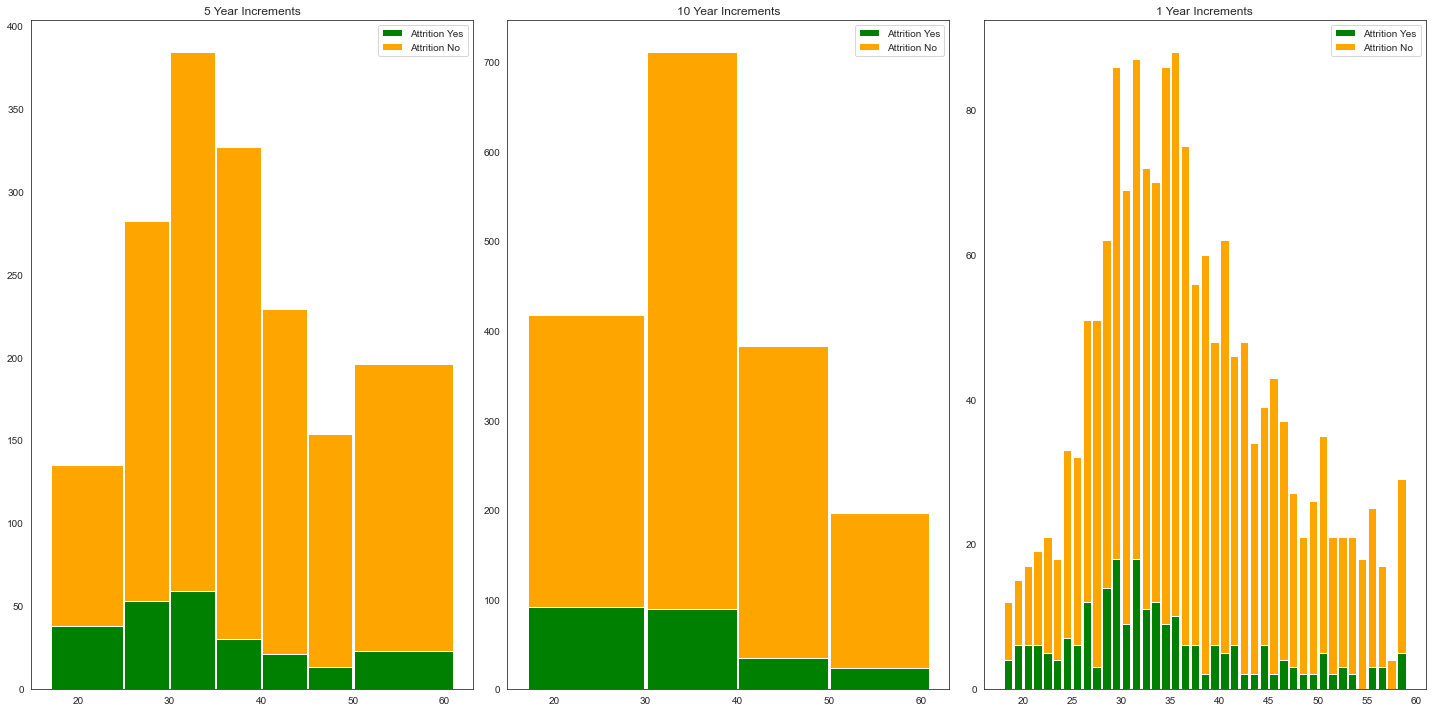

In [75]:
#plot histogram to confirm no changes in distribution. 

fig, ((ax0, ax1,ax2)) = plt.subplots( ncols=3,figsize=(20, 10))

ax0.hist([Final_df['Age'].loc[Final_df['Target_Attrition_Flag_x']==1],
          Final_df['Age']],bins=bins5, stacked=True,color=['green', 'orange'], 
          rwidth=0.98,label=['Attrition Yes', 'Attrition No'])
ax0.set_title('5 Year Increments')
ax0.legend(prop={'size': 10})

ax1.hist([Final_df['Age'].loc[Final_df['Target_Attrition_Flag_x']==1],
          Final_df['Age']],bins=bins10, stacked=True,color=['green', 'orange'], 
          rwidth=0.98,label=['Attrition Yes', 'Attrition No'])
ax1.set_title('10 Year Increments')
ax1.legend(prop={'size': 10})

ax2.hist([Final_df['Age'].loc[Final_df['Target_Attrition_Flag_x']==1],
          Final_df['Age']],bins=bins1, stacked=True,color=['green', 'orange'], 
          rwidth=0.85,label=['Attrition Yes', 'Attrition No'])
ax2.set_title('1 Year Increments')
ax2.legend(prop={'size': 10})

fig.tight_layout()
plt.show()


In [53]:

 
    
###########################################################
#Example code from:
#https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-1-dimensional-function-from-scratch-in-keras/
###########################################################    
# define the combined generator and discriminator model, for updating the generator
# By setting trainable=False after the discriminator has been compiled the discriminator is 
# still trained during discriminator.train_on_batch but since it's set to non-trainable before the 
# combined model is compiled it's not trained during combined.train_on_batch.



# train a generative adversarial network on a one-dimensional function
from numpy import hstack
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
 
# define the standalone discriminator model
def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model




# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam') ## This is where the loss function in the paper, expression (1) 
	return model
 


# train the generator and discriminator
#this is where you pass the weights 
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
	# determine half the size of one batch, for updating the discriminator
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare real samples
		x_real, y_real = generate_real_samples(half_batch)### dont need this line ###
		# prepare fake examples
		x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)### dont need this line ###
		# update discriminator
		d_model.train_on_batch(x_real, y_real)
		d_model.train_on_batch(x_fake, y_fake)### We only need one line i think, 
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch) ### this funtion just get a buch of random numbers the same size as the needed inpute. Not needed 
		# create inverted labels for the fake samples
		y_gan = ones((n_batch, 1))# target from above, not needed
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan) ##$### Is this where we pass the weights from the Predicotor model? ##$###
		# evaluate the model every n_eval epochs
		if (i+1) % n_eval == 0:
			summarize_performance(i, g_model, d_model, latent_dim) ## should not need this as it produce charts 




# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator()
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

ModuleNotFoundError: No module named 'keras'